In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.projections import get_projection_class
import matplotlib.cm as cm
from matplotlib import colors
from mplsoccer import Pitch, add_image, VerticalPitch, FontManager, PyPizza
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from highlight_text import ax_text, fig_text
import datetime
from sklearn.linear_model import LinearRegression
from PIL import Image
from urllib.request import urlopen
import warnings
warnings.filterwarnings("ignore")

font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

from matplotlib.font_manager import FontProperties
font_prop = FontProperties(fname="/usr/share/fonts/Nippo-Regular.ttf")
mpl.rcParams['font.family'] = font_prop.get_name()


In [19]:
def setup(df):
    df = df[(df["Comp"]=="La Liga")|(df["Comp"]=="Ligue 1")|(df["Comp"]=="Bundesliga")]
    try:
        df = df[df["PSxG_Performance"].str.contains("On matchday squad, but did not play")==False]
    except AttributeError:
        pass
    # df.set_index(keys="Date",inplace=True)
    df = df.dropna(subset=["PSxG_Performance"],axis=0)
    df["psxG - gA"] = df["PSxG_Performance"].astype(float) - df["GA_Performance"].astype(float)
    psxG = df["psxG - gA"].rolling(3).mean()
    psxG = psxG[~psxG.isna()][0:-1]
    df = df.reset_index()
    df["index"] = np.arange(0,len(df))
    return df,psxG

In [28]:
path = "/work/assets/fbref/playerStats/matchLogs/Marc-Andre-ter-Stegen/keeper/"
df17 = pd.read_csv(path+f"2017-2018.csv")
df18 = pd.read_csv(path+f"2018-2019.csv")
df19 = pd.read_csv(path+f"2019-2020.csv")
df20 = pd.read_csv(path+f"2020-2021.csv")
df21 = pd.read_csv(path+f"2021-2022.csv")
df22 = pd.read_csv(path+f"2022-2023.csv")


df17,psxG17 = setup(df17)
df18,psxG18 = setup(df18)
df19,psxG19 = setup(df19)
df20,psxG20 = setup(df20)
df21,psxG21 = setup(df21)
df22,psxG22 = setup(df22)

player = path.split("/")[-3]
print(player)
# players = [
#     "Ter Stegen",
#     "Oblak",
#     "Donnarumma",
#     "Ederson"
# ]
# path = "/work/assets/fbref/leagueStats/ligue/2021/defense.csv"
# comp = "ligue"
# season = "2021-2022"
# df = pd.read_csv(f"/work/assets/fbref/playerStats/matchLogs/{players[0]}/{category}/{season}.csv")


# print(df17.columns)
# df17 = df17[df17["PSxG_Performance"].str.contains("On matchday squad, but did not play")==False]
# df17.set_index(keys="Date",inplace=True)
# df17 = df17.dropna(subset=["PSxG_Performance"],axis=0)
# print(len(df17))
# df17["psxG - gA"] = df17["PSxG_Performance"].astype(float) - df17["GA_Performance"].astype(float)
# df17.head()
# psxG = df17["psxG - gA"].rolling(3).mean()
# psxG = psxG[~psxG.isna()][0:-1]
# len(psxG)
# psxG

Marc-Andre-ter-Stegen


In [29]:
a = pd.read_csv("/work/assets/fbref/leagueStats/liga/1819/keeper.csv")
a["Saves_Performance"].sum()/a["SoTA_Performance"].sum()

0.7212200721548049

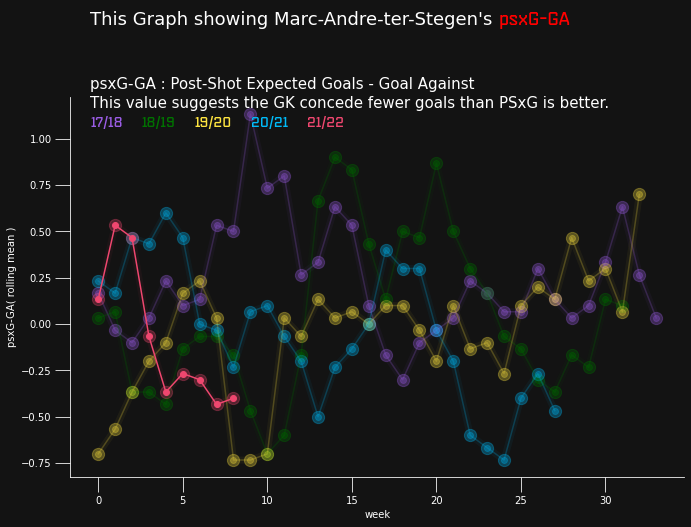

In [30]:
fig,ax = plt.subplots(figsize = (11,7))
fig.set_facecolor("#131313")
ax.set_facecolor("#131313")
ax.set_zorder(1)

ax.tick_params(colors="w", length=15, left=True, bottom=True, labelbottom=True, labelleft=True)
ax.set_xlabel("week",color="w")
ax.set_ylabel("psxG-GA( rolling mean )",color="w")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color("w")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("w")

ax.scatter(range(len(psxG17)), psxG17, color="#9b5de5",alpha=.3,s=150)
ax.scatter(range(len(psxG18)), psxG18, color="#007200",alpha=.3,s=150)
ax.scatter(range(len(psxG19)), psxG19, color="#fee440",alpha=.3,s=150)
ax.scatter(range(len(psxG20)), psxG20, color="#00bbf9",alpha=.3,s=150)
ax.scatter(range(len(psxG21)), psxG21, color="#ef476f",alpha=.3,s=150)

ax.plot(np.array(range(len(psxG17))), psxG17, marker="o", label="2017/18", color="#9b5de5", alpha=.23)
ax.plot(np.array(range(len(psxG17))), psxG17, marker="o", label="2017/18", color="#9b5de5", alpha=.05, lw=7)

ax.plot(np.array(range(len(psxG18))), psxG18, marker="o", label="2018/19", color="#007200", alpha=.23)
ax.plot(np.array(range(len(psxG18))), psxG18, marker="o", label="2018/19", color="#007200", alpha=.05, lw=7)

ax.plot(np.array(range(len(psxG19))), psxG19, marker="o", label="2019/20", color="#fee440", alpha=.23)
ax.plot(np.array(range(len(psxG19))), psxG19, marker="o", label="2019/20", color="#fee440", alpha=.05, lw=7)

ax.plot(np.array(range(len(psxG20))), psxG20, marker="o", label="2020/21", color="#00bbf9", alpha=.23)
ax.plot(np.array(range(len(psxG20))), psxG20, marker="o", label="2020/21", color="#00bbf9", alpha=.05, lw=7)

ax.plot(np.array(range(len(psxG21))), psxG21, marker="o", label="2021/22", color="#ef476f", alpha=1)
ax.plot(np.array(range(len(psxG21))), psxG21, marker="o", label="2021/22", color="#ef476f", alpha=.05, lw=7)


# ax.fill_between(x=range(len(psxG18)),y1=psxG17[:-2].values,y2=psxG18.values, 
#                 where=psxG17[:-2].values >= psxG18.values,
#                 facecolor="#2bb6e0", interpolate=True,
#                 linestyle="-.", alpha=.3)
# ax.fill_between(range(len(psxG18)),psxG17[:-2].values, psxG18.values, where=psxG17[:-2].values <= psxG18.values, facecolor="red", interpolate=True)
# ax.fill_between(range(len(psxG18)),psxG19[:-1].values, psxG18.values, where=psxG19[:-1].values >= psxG18.values, facecolor="green", interpolate=True)
# ax.fill_between(range(len(psxG18)),psxG19[:-1].values, psxG18.values, where=psxG19[:-1].values <= psxG18.values, facecolor="pink", interpolate=True)

fig_text(
    x=.15,y=1.05,
    s=f"This Graph showing {player}'s <psxG-GA>",
    color="#ffffff",
    fontsize=18,
    highlight_textprops=[{"color":"red", 'weight':'semibold', 'fontproperties':font_prop}],
)
fig_text(
    x=.15,y=.92,
    s="psxG-GA : Post-Shot Expected Goals - Goal Against \nThis value suggests the GK concede fewer goals than PSxG is better. \n\
<17/18>    <18/19>    <19/20>    <20/21>    <21/22>",
    fontsize=15,
    color='#ffffff',
    highlight_textprops=[
        {"color":"#9b5de5", 'weight':'semibold', 'fontproperties':font_prop},
        {"color":"#007200", 'weight':'semibold', 'fontproperties':font_prop},
        {"color":"#fee440", 'weight':'semibold', 'fontproperties':font_prop},
        {"color":"#00bbf9", 'weight':'semibold', 'fontproperties':font_prop},
        {"color":"#ef476f", 'weight':'semibold', 'fontproperties':font_prop},
    ],
)

plt.savefig(f'/work/output/image00_{player}.png', 
            dpi=200, bbox_inches="tight",facecolor='#131313')

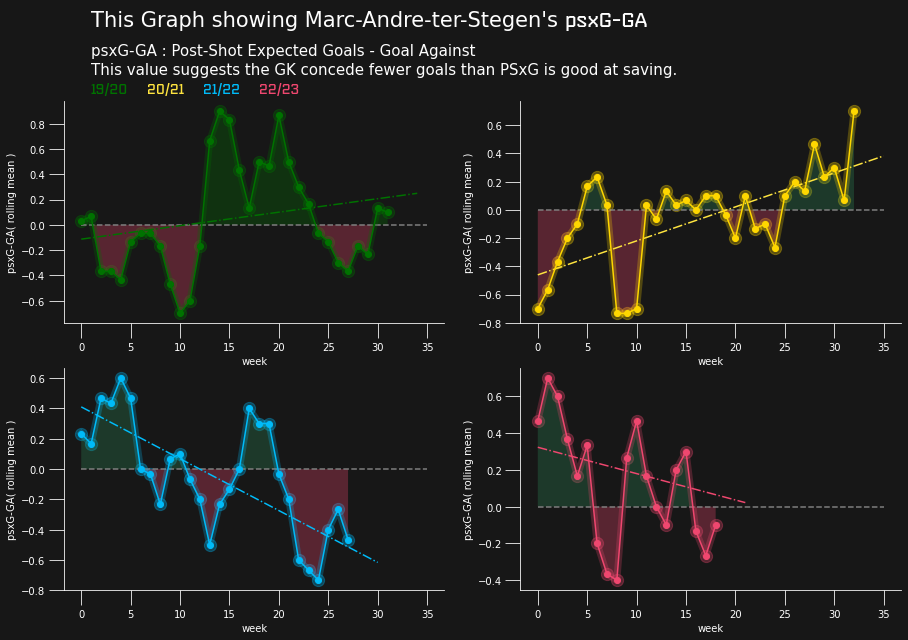

In [48]:
fig,axes = plt.subplots(2,2,figsize = (15,9))
fig.set_facecolor("#171717")

axes = axes.ravel()

def plot(ax,idx):
    ax.set_facecolor("#171717")
    ax.set_zorder(1)

    ax.tick_params(colors="w", length=15, left=True, bottom=True, labelbottom=True, labelleft=True)
    ax.set_xlabel("week",color="w")
    ax.set_ylabel("psxG-GA( rolling mean )",color="w")

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_color("w")
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color("w")
    
    ax.plot((0,35),(0,0),ls="--",color="gray")
    
    lr = LinearRegression()
    
    
    if idx == 0:

        x = df18[["index"]].values
        y = df18[["psxG - gA"]].values
        lr.fit(x,y)

        ax.scatter(range(len(psxG18)), psxG18, color="#007200",alpha=.3,s=150)
        ax.plot(x, lr.predict(x), color='#007200',ls="-.") # 回帰直線をプロット

        
        ax.plot(np.array(range(len(psxG18))), psxG18, marker="o", label="2018/19", color="#007200",alpha=1)
        ax.plot(np.array(range(len(psxG18))), psxG18, marker="o", label="2018/19", color="#007200", alpha=.25, lw=7)

        #ax.plot(np.array(range(len(psxG21))), psxG21, marker="o", label="2021/22", color="#ef476f",alpha=1)
        #ax.plot(np.array(range(len(psxG21))), psxG21, marker="o", label="2021/22", color="#ef476f",alpha=.25, lw=7)

        ax.fill_between(x=range(len(psxG18)),y1=psxG18.values[:],y2=0, 
                        where=psxG18.values[:len(psxG18)] >= 0,
                        facecolor="#007200", interpolate=True,
                        linestyle="-.", alpha=.3)

        ax.fill_between(x=range(len(psxG18)),y1=psxG18.values[:],y2=0, 
                        where=psxG18.values[:len(psxG18)] <= 0,
                        facecolor="#ef476f", interpolate=True,
                        linestyle="-.", alpha=.3)

    elif idx == 1:
        
        x = df19[["index"]].values
        y = df19[["psxG - gA"]].values
        lr.fit(x,y)

        ax.scatter(range(len(psxG19)), psxG19, color="gold",alpha=.3,s=150)
        ax.plot(x, lr.predict(x), color='#fee440',ls="-.") # 回帰直線をプロット

        
        ax.plot(np.array(range(len(psxG19))), psxG19, marker="o", label="2019/20", color="gold",alpha=1)
        ax.plot(np.array(range(len(psxG19))), psxG19, marker="o", label="2019/20", color="gold", alpha=.25, lw=7)

        #ax.plot(np.array(range(len(psxG21))), psxG21, marker="o", label="2021/22", color="#ef476f",alpha=1)
        #ax.plot(np.array(range(len(psxG21))), psxG21, marker="o", label="2021/22", color="#ef476f",alpha=.25, lw=7)

        ax.fill_between(x=range(len(psxG19)),y1=psxG19.values[:],y2=0, 
                        where=psxG19.values[:len(psxG19)] >= 0,
                        facecolor="seagreen", interpolate=True,
                        linestyle="-.", alpha=.3)

        ax.fill_between(x=range(len(psxG19)),y1=psxG19.values[:],y2=0, 
                        where=psxG19.values[:len(psxG19)] <= 0,
                        facecolor="#ef476f", interpolate=True,
                        linestyle="-.", alpha=.3)

    elif idx == 2:
        
        x = df20[["index"]].values
        y = df20[["psxG - gA"]].values
        lr.fit(x,y)

        ax.scatter(range(len(psxG20)), psxG20, color="#00bbf9",alpha=.3,s=150)
        ax.plot(x, lr.predict(x), color='#00bbf9',ls="-.") # 回帰直線をプロット
        
        ax.plot(np.array(range(len(psxG20))), psxG20, marker="o", label="2020/21", color="#00bbf9",alpha=1)
        ax.plot(np.array(range(len(psxG20))), psxG20, marker="o", label="2020/21", color="#00bbf9", alpha=.25, lw=7)

        #ax.plot(np.array(range(len(psxG21))), psxG21, marker="o", label="2021/22", color="#ef476f",alpha=1)
        #ax.plot(np.array(range(len(psxG21))), psxG21, marker="o", label="2021/22", color="#ef476f",alpha=.25, lw=7)

        ax.fill_between(x=range(len(psxG20)),y1=psxG20.values[:],y2=0, 
                        where=psxG20.values[:len(psxG20)] >= 0,
                        facecolor="seagreen", interpolate=True,
                        linestyle="-.", alpha=.3)

        ax.fill_between(x=range(len(psxG20)),y1=psxG20.values[:],y2=0, 
                        where=psxG20.values[:len(psxG20)] <= 0,
                        facecolor="#ef476f", interpolate=True,
                        linestyle="-.", alpha=.3)
        
    elif idx == 3:
        
        x = df21[["index"]].values
        y = df21[["psxG - gA"]].values
        lr.fit(x,y)

        #ax.scatter(range(len(psxG21)), psxG21, color="#00bbf9",alpha=.3,s=150)
        #ax.plot(x, lr.predict(x), color='#00bbf9',ls="-.") # 回帰直線をプロット
        
        x = df22[["index"]].values
        y = df22[["psxG - gA"]].values
        lr.fit(x,y)

        ax.scatter(range(len(psxG22)), psxG22, color="#ef476f",alpha=.3,s=150)
        ax.plot(x, lr.predict(x), color='#ef476f',ls="-.") # 回帰直線をプロット

        
        #ax.plot(np.array(range(len(psxG21))), psxG21, marker="o", label="2021/22", color="#00bbf9",alpha=1)
        #ax.plot(np.array(range(len(psxG21))), psxG21, marker="o", label="2021/22", color="#00bbf9", alpha=.25, lw=7)

        ax.plot(np.array(range(len(psxG22))), psxG22, marker="o", label="2022/23", color="#ef476f",alpha=1)
        ax.plot(np.array(range(len(psxG22))), psxG22, marker="o", label="2022/23", color="#ef476f",alpha=.25, lw=7)

        ax.fill_between(x=range(len(psxG22)),y1=psxG22.values[:],y2=0, 
                        where=psxG22.values[:len(psxG22)] >= 0,
                        facecolor="seagreen", interpolate=True,
                        linestyle="-.", alpha=.3)

        ax.fill_between(x=range(len(psxG22)),y1=psxG22.values[:],y2=0, 
                        where=psxG22.values[:len(psxG22)] <= 0,
                        facecolor="#ef476f", interpolate=True,
                        linestyle="-.", alpha=.3)
        # ax.fill_between(range(len(psxG18)),psxG19[:-1].values, psxG18.values, where=psxG19[:-1].values >= psxG18.values, facecolor="green", interpolate=True)
        # ax.fill_between(range(len(psxG18)),psxG19[:-1].values, psxG18.values, where=psxG19[:-1].values <= psxG18.values, facecolor="pink", interpolate=True)

for idx,ax in enumerate(axes):
    plot(ax,idx)
    
fig_text(
    x=.15,y=1.02,
    s=f"This Graph showing {player}'s <psxG-GA>",
    color="#fefefe",
    fontsize=21,
    highlight_textprops=[{"color":"white", 'weight':'bold', 'fontproperties':font_prop}],
    fontname=font_prop.get_name()
)
fig_text(
    x=.15,y=.97,
    s="psxG-GA : Post-Shot Expected Goals - Goal Against \nThis value suggests the GK concede fewer goals than PSxG is good at saving. \n\
<19/20>    <20/21>    <21/22>    <22/23>",
    fontsize=15,
    color='#fefefe',
    highlight_textprops=[
        #{"color":"#9b5de5", 'weight':'bold', 'fontproperties':font_prop},
        {"color":"#007200", 'weight':'bold', 'fontproperties':font_prop},
        {"color":"#fee440", 'weight':'bold', 'fontproperties':font_prop},
        {"color":"#00bbf9", 'weight':'bold', 'fontproperties':font_prop},
        {"color":"#ef476f", 'weight':'bold', 'fontproperties':font_prop},
    ],
    fontname=font_prop.get_name()
)

plt.savefig(f'/work/output/image2_{player}.png', 
            dpi=200, bbox_inches="tight",facecolor='#131313')

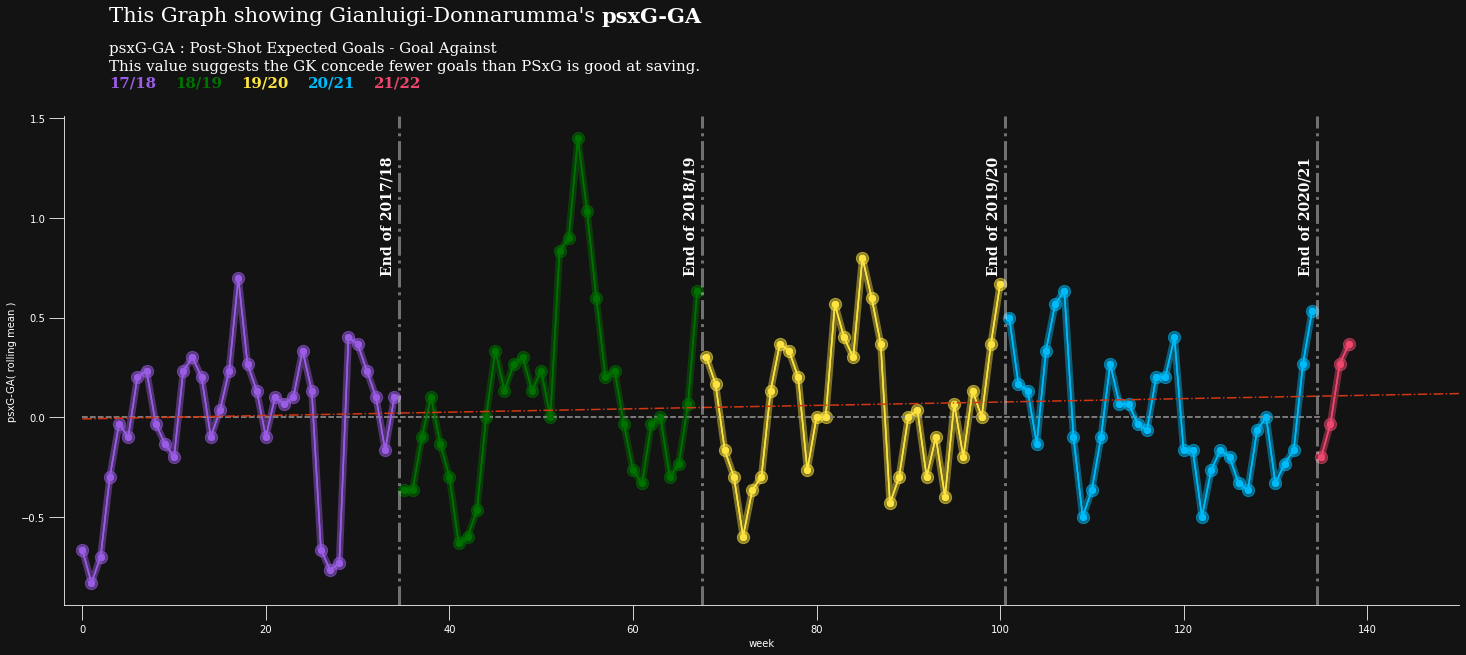

In [94]:
fig,ax = plt.subplots(figsize = (25,9))
fig.set_facecolor("#131313")


def plot(ax,idx):
    ax.set_facecolor("#131313")
    ax.set_zorder(1)

    ax.tick_params(colors="w", length=15, left=True, bottom=True, labelbottom=True, labelleft=True)
    ax.set_xlabel("week",color="w")
    ax.set_ylabel("psxG-GA( rolling mean )",color="w")

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_color("w")
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color("w")
    
    ax.plot((0,135),(0,0),ls="--",color="gray")

    # 17
    ax.scatter(range(len(psxG17)), psxG17, color="#9b5de5",alpha=.3,s=150)

    ax.plot(np.array(range(len(psxG17))), psxG17, marker="o", label="2017/18", color="#9b5de5",alpha=1)
    ax.plot(np.array(range(len(psxG17))), psxG17, marker="o", label="2017/18", color="#9b5de5", alpha=.25, lw=7)


    # 18
    ax.scatter(range(len(psxG17),len(psxG17)+len(psxG18)), psxG18, color="#007200",alpha=.3,s=150)

    ax.plot(np.array(range(len(psxG17),len(psxG17)+len(psxG18))), psxG18, marker="o", label="2018/19", color="#007200",alpha=1)
    ax.plot(np.array(range(len(psxG17),len(psxG17)+len(psxG18))), psxG18, marker="o", label="2018/19", color="#007200", alpha=.25, lw=7)

    # 19
    ax.scatter(range(len(psxG17)+len(psxG18),len(psxG17)+len(psxG18)+len(psxG19)), psxG19, color="#fee440",alpha=.3,s=150)

    ax.plot(np.array(range(len(psxG17)+len(psxG18),len(psxG17)+len(psxG18)+len(psxG19))), psxG19, marker="o", label="2019/20", color="#fee440",alpha=1)
    ax.plot(np.array(range(len(psxG17)+len(psxG18),len(psxG17)+len(psxG18)+len(psxG19))), psxG19, marker="o", label="2019/20", color="#fee440", alpha=.25, lw=7)

    # 20
    ax.scatter(range(len(psxG17)+len(psxG18)+len(psxG19),
                     len(psxG17)+len(psxG18)+len(psxG19)+len(psxG20)), psxG20, color="#00bbf9",alpha=.3,s=150)
    
    ax.plot(np.array(range(len(psxG17)+len(psxG18)+len(psxG19),len(psxG17)+len(psxG18)+len(psxG19)+len(psxG20))), psxG20, marker="o", label="2020/21", color="#00bbf9",alpha=1)
    ax.plot(np.array(range(len(psxG17)+len(psxG18)+len(psxG19),len(psxG17)+len(psxG18)+len(psxG19)+len(psxG20))), psxG20, marker="o", label="2020/21", color="#00bbf9",alpha=.25, lw=7)

    # 21
    ax.scatter(range(len(psxG17)+len(psxG18)+len(psxG19)+len(psxG20),
                     len(psxG17)+len(psxG18)+len(psxG19)+len(psxG20)+len(psxG21)), psxG21, color="#ef476f",alpha=.3,s=150)

    ax.plot(np.array(range(len(psxG17)+len(psxG18)+len(psxG19)+len(psxG20),
                           len(psxG17)+len(psxG18)+len(psxG19)+len(psxG20)+len(psxG21))), psxG21, marker="o", label="2021/22", color="#ef476f",alpha=1)
    ax.plot(np.array(range(len(psxG17)+len(psxG18)+len(psxG19)+len(psxG20),
                           len(psxG17)+len(psxG18)+len(psxG19)+len(psxG20)+len(psxG21))), psxG21, marker="o", label="2021/22", color="#ef476f",alpha=.25, lw=7)

plot(ax,0)
plot(ax,1)

    
fig_text(
    x=.15,y=1.02,
    s=f"This Graph showing {player}'s <psxG-GA>",
    color="#ffffff",
    fontsize=21,
    highlight_colors=["white"],
    highlight_weights = 'bold',
    fontname='serif'
)
fig_text(
    x=.15,y=.92,
    s="psxG-GA : Post-Shot Expected Goals - Goal Against \nThis value suggests the GK concede fewer goals than PSxG is good at saving. \n\
<17/18>    <18/19>    <19/20>    <20/21>    <21/22>",
    fontsize=15,
    color='#ffffff',
    highlight_colors=['#9b5de5','#007200','#fee440','#00bbf9',"#ef476f"],
    highlight_weights = 'bold',
    fontname='serif'
)
ax.axvline(x=len(psxG17)-.5,
           color="w", linewidth=3, linestyle="-.", alpha=0.4 ,zorder=3)
ax.text(x=len(psxG17)-2.5,y=.73,s="End of 2017/18", rotation="vertical",fontname="serif",
           color="w", fontsize=14, fontweight="bold", alpha=1 ,zorder=3)

ax.axvline(x=len(psxG17)+len(psxG18)-.5,
           color="w", linewidth=3, linestyle="-.", alpha=0.4 ,zorder=3)
ax.text(x=len(psxG17)+len(psxG18)-2.5,y=.73,s="End of 2018/19", rotation="vertical",fontname="serif",
           color="w", fontsize=14, fontweight="bold", alpha=1 ,zorder=3)

ax.axvline(x=len(psxG17)+len(psxG18)+len(psxG19)-.5,
           color="w", linewidth=3, linestyle="-.", alpha=0.4 ,zorder=3)
ax.text(x=len(psxG17)+len(psxG18)+len(psxG19)-2.5,y=.73,s="End of 2019/20", rotation="vertical",fontname="serif",
           color="w", fontsize=14, fontweight="bold", alpha=1 ,zorder=3)

ax.axvline(x=len(psxG17)+len(psxG18)+len(psxG19)+len(psxG20)-.5,
           color="w", linewidth=3, linestyle="-.", alpha=0.4 ,zorder=3)
ax.text(x=len(psxG17)+len(psxG18)+len(psxG19)+len(psxG20)-2.5,y=.73,s="End of 2020/21", rotation="vertical",fontname="serif",
           color="w", fontsize=14, fontweight="bold", alpha=1 ,zorder=3)



ax.set_xlim(-2,150)

dfF = pd.concat([df17,df18,df19,df20,df21])
dfF = dfF.reset_index()
dfF["index"] = dfF.index
lr = LinearRegression()
x = dfF[["index"]].values
y = dfF[["psxG - gA"]].values
lr.fit(x,y)
ax.plot(x, lr.predict(x), color='#D63713',ls="-.") # 回帰直線をプロット


plt.savefig(f'/work/output/image3_{player}.png', 
            dpi=200, bbox_inches="tight",facecolor='#131313')

In [50]:
# df17["psxG - gA"].describe()["mean"]

In [99]:
players = [
    "Marc-Andre-ter-Stegen",
    "Jan-Oblak",
    "Gianluigi-Donnarumma",
    "Ederson"
]

df_summary = pd.read_csv(f"/work/assets/fbref/seasonStats/{players[0]}-summary.csv")
df_shot = pd.read_csv(f"/work/assets/fbref/seasonStats/{players[0]}-shot.csv")
df = pd.concat([df_shot, df_summary], axis=1)

df = df.loc[:,~df.columns.duplicated()]
# df = df.dropna(subset=['PSxG+/-_Expected'])
df = df.loc[6:10,:]
print(df.columns)
# df.index = [6,7,8,9,10]
# df.sort_values(by='PSxG+/-_Expected', ascending=False).reset_index().head(20)
df

Index(['Unnamed: 0', 'Season', 'Age', 'Squad', 'Country', 'Comp', 'LgRank',
       '90s', 'GA_Goals', 'PKA_Goals', 'FK_Goals', 'CK_Goals', 'OG_Goals',
       'PSxG_Expected', 'PSxG/SoT_Expected', 'PSxG+/-_Expected',
       '/90_Expected', 'Cmp_Launched', 'Att_Launched', 'Cmp%_Launched',
       'Att_Passes', 'Thr_Passes', 'Launch%_Passes', 'AvgLen_Passes',
       'Att_Goal Kicks', 'Launch%_Goal Kicks', 'AvgLen_Goal Kicks',
       'Opp_Crosses', 'Stp_Crosses', 'Stp%_Crosses', '#OPA_Sweeper',
       '#OPA/90_Sweeper', 'AvgDist_Sweeper', 'MP_Playing Time',
       'Starts_Playing Time', 'Min_Playing Time', '90s_Playing Time',
       'GA_Performance', 'GA90_Performance', 'SoTA_Performance',
       'Saves_Performance', 'Save%_Performance', 'W_Performance',
       'D_Performance', 'L_Performance', 'CS_Performance', 'CS%_Performance',
       'PKatt_Penalty Kicks', 'PKA_Penalty Kicks', 'PKsv_Penalty Kicks',
       'PKm_Penalty Kicks', 'Save%_Penalty Kicks'],
      dtype='object')


,Unnamed: 0,Season,Age,Squad,Country,Comp,LgRank,90s,GA_Goals,PKA_Goals,...,W_Performance,D_Performance,L_Performance,CS_Performance,CS%_Performance,PKatt_Penalty Kicks,PKA_Penalty Kicks,PKsv_Penalty Kicks,PKm_Penalty Kicks,Save%_Penalty Kicks
6,6,2017-2018,25,Barcelona,es ESP,1. La Liga,1st,37.0,28,2,...,27,9,1,19,51.4,2,2,0,0,0.0
7,7,2018-2019,26,Barcelona,es ESP,1. La Liga,1st,35.0,32,1,...,25,8,2,16,45.7,1,1,0,0,0.0
8,8,2019-2020,27,Barcelona,es ESP,1. La Liga,2nd,36.0,36,6,...,24,6,6,14,38.9,7,6,1,0,14.3
9,9,2020-2021,28,Barcelona,es ESP,1. La Liga,3rd,31.0,32,3,...,21,5,5,11,35.5,3,3,0,0,0.0
10,10,2021-2022,29,Barcelona,es ESP,1. La Liga,7th,12.0,13,0,...,5,4,3,3,25.0,0,0,0,0,NaN


In [100]:
# df['Saves_Performance'] = df['Saves_Performance'].astype(float)
# df['SoTA_Performance'] = df['SoTA_Performance'].astype(float)
# df['Opp_Crosses'] = df['Opp_Crosses'].astype(float)
# df['Stp_Crosses'] = df['Stp_Crosses'].astype(float)
# df['PKatt_Penalty Kicks'] = df['PKatt_Penalty Kicks'].astype(float)
# df['PKsv_Penalty Kicks'] = df['PKsv_Penalty Kicks'].astype(float)

# save_per = round((df.loc[6:11,'Saves_Performance'].sum()/df.loc[6:11,'SoTA_Performance'].sum()) * 100,2)
# cross_per = round((df.loc[6:11,'Stp_Crosses'].sum()/df.loc[6:11,'Opp_Crosses'].sum()) * 100,2)
# savePk_per = round((df.loc[6:11,'PKsv_Penalty Kicks'].sum()/df.loc[6:11,'PKatt_Penalty Kicks'].sum()) * 100,2)

# print(save_per,savePk_per,cross_per)

df = df[['90s',"PSxG_Expected", 'PSxG+/-_Expected', 'GA90_Performance',
         'Saves_Performance', 'Save%_Performance', 'Save%_Penalty Kicks','Stp%_Crosses',
         '#OPA_Sweeper', 'AvgDist_Sweeper',
         'Att_Passes', 'AvgLen_Passes']]
df = df.astype(float)
df.loc[:, ["PSxG_Expected",'PSxG+/-_Expected',
           'Saves_Performance','#OPA_Sweeper',  'Att_Passes']] = df.loc[:, ["PSxG_Expected",'PSxG+/-_Expected',
                                                                            'Saves_Performance', "#OPA_Sweeper",'Att_Passes']].apply(lambda x:x/df["90s"])
df = df.drop(columns=["90s"])

# df_player = df_player.sort_values(by="Att_Passes", ascending=False)
# values = df_player.iloc[:,1:].values.tolist()

# print("values :",len(values[0]))
# df_player

In [109]:
params = df.columns.tolist()

print("params :",len(params))
params = [
 'PSxG',
 'PSxG - GA',
 'GA90',
 'Saves',
 'Save Percentage',
 'Save% PK',
 'Stp% Crosses',
 '#OPA Sweeper',
 'AvgDist Sweeper',
 'Att Passes',
 'AvgLen Passes'
]

params : 11


In [110]:
# values = df.mean()+50

# # values["Save%_Performance"] = save_per 
# # values['Save%_Penalty Kicks'] = savePk_per
# # values['Stp%_Crosses'] = cross_per

# values = [np.round(val,1) for val in values]
# values

df.reset_index(inplace=True,drop=True)
df = df.fillna(0)

In [112]:
a = df["Save%_Performance"]
b = df['Save%_Penalty Kicks']
c = df['Stp%_Crosses']

print(a)

values = df.values.round(2)+50
# print(a)

for i in range(len(values)):
    values[i][4]=a[i]
    values[i][5]=b[i]
    values[i][6]=c[i] 
    

0    79.8
1    73.3
2    72.7
3    71.6
4    62.9
Name: Save%_Performance, dtype: float64


In [122]:
len(values[1])

12/13

0.9230769230769231

In [15]:
slice_colors = ["#13D647"] * 3 + ["#D6D013"]*3 + ["#00bbf9"] * 3 + ["#ef476f"] * 2
text_colors = ["#FFFFFF"] * 11

In [114]:
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#131313",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
#     straight_line_limit=25,
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=17,          # size of inner circle
#     min_range=None, max_range=100,
)

# len(values[4])
# values[4][4] = 0

team: ???? ter21


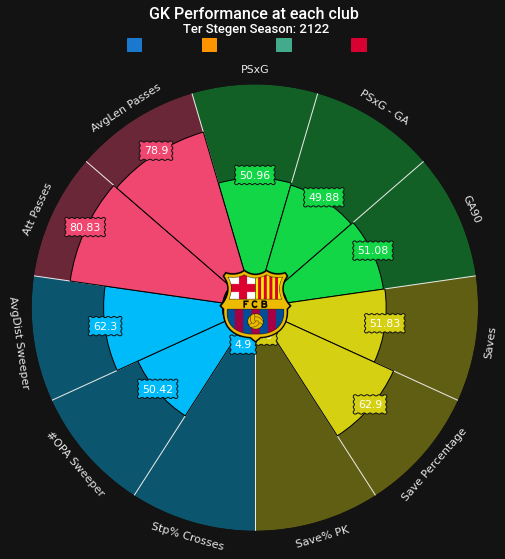

In [120]:
textColor = "#ffffff"

fig, ax = baker.make_pizza(
    values[4],                       # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
#     param_location=28,
    kwargs_slices=dict(
        facecolor="#131313", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color=textColor, fontsize=11,
        va="center", alpha=.9
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color=textColor, fontsize=11, alpha=1,
        zorder=3,
        bbox=dict(
            edgecolor="#111111", facecolor="#6CABDD",
            boxstyle="Roundtooth,pad=0.5", lw=1
        )
    )                    # values to be used when adding parameter-values
)
fig.patches.extend([
    plt.Rectangle(
        (0.29, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.42, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.55, 0.9225), 0.025, 0.021, fill=True, color="#43aa8b",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.68, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])
# add title
fig.text(
    0.511, 0.975, "GK Performance at each club", size=16,
    ha="center", fontproperties=font_bold.prop, color=textColor
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Ter Stegen Season: 2122",
    size=13,
    ha="center", fontproperties=font_bold.prop, color=textColor
)

# add credits
CREDIT_1 = "data: transfermarkt.com"
CREDIT_2 = "inspired by: @Worville, @FootballSlices"

# fig.text(
#     0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
#     fontproperties=font_italic.prop, color=textColor,
#     ha="right"
# )

# # add text
# fig.text(  
#     0.32, 0.925, "GK                 DF                 MF               FW", size=14,
#     fontproperties=font_bold.prop, color=textColor
# )
# URL = "https://github.com/andrewRowlinson/mplsoccer-assets/blob/main/fdj_cropped.png?raw=true"
# wikiのエンブレムをクリックして右下クリックー＞EMbded
# URL = "https://upload.wikimedia.org/wikipedia/en/thumb/e/eb/Manchester_City_FC_badge.svg/1200px-Manchester_City_FC_badge.svg.png"
URL = "https://upload.wikimedia.org/wikipedia/en/thumb/4/47/FC_Barcelona_%28crest%29.svg/1200px-FC_Barcelona_%28crest%29.svg.png"
# URL = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/FC_Bayern_M%C3%BCnchen_logo_%282017%29.svg/1200px-FC_Bayern_M%C3%BCnchen_logo_%282017%29.svg.png"
# URL = "https://upload.wikimedia.org/wikipedia/en/thumb/f/f4/Atletico_Madrid_2017_logo.svg/1200px-Atletico_Madrid_2017_logo.svg.png"
# URL = "https://upload.wikimedia.org/wikipedia/en/thumb/a/a7/Paris_Saint-Germain_F.C..svg/1200px-Paris_Saint-Germain_F.C..svg.png"
fdj_cropped = Image.open(urlopen(URL))
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.147,alpha=1
)   # these values might differ when you are plotting

team = input("team: ????")
plt.savefig(f'/work/output/{team}.png', dpi=200, bbox_inches="tight",facecolor="#131313")

In [3]:
import pandas as pd

dfs = []

for i in range(1,14):
    df = pd.read_csv(f"/work/assets/understats/2122/Barcelona/#{i}.csv")
    dfs.append(df)
dfF = pd.concat(dfs)

In [7]:
dfF = dfF[dfF["team"]!="Barcelona"]

In [13]:
15/13

1.1538461538461537

# 